# Scoop Initialization

In [1]:
from neuralnetwork import Network
from neuralnetwork.datasets import nregion
from neuralnetwork.activations import absolute, relu, sigmoid

Layer: L0, Neurons: 1
Layer: L1, Neurons: 30, Weights: (30, 1), Biases: (30, 1)
Layer: L2, Neurons: 30, Weights: (30, 30), Biases: (30, 1)
Layer: L3, Neurons: 1, Weights: (1, 30), Biases: (1, 1)


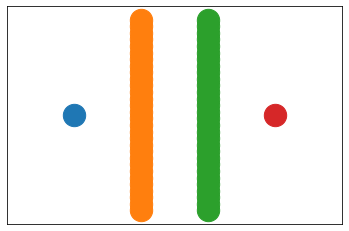

In [2]:
mynetwork = Network(1)
mynetwork.add_layer(number_of_neurons = 30 , activation=absolute)
mynetwork.add_layer(number_of_neurons = 30, activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

In [5]:
regions = mynetwork.layers['L1']['biases'].shape[0]
num_regions = regions // 2
num_regions

15

# Apply scoop initialization

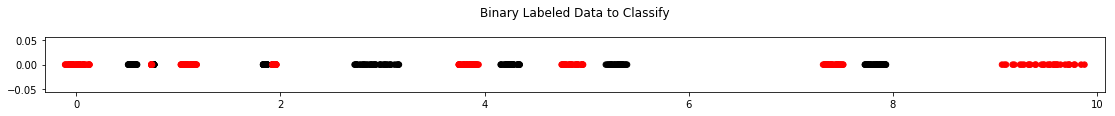

In [6]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions= num_regions)
nregion.graph(X_train, Y_train)

In [7]:
len(C)

7

In [38]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))

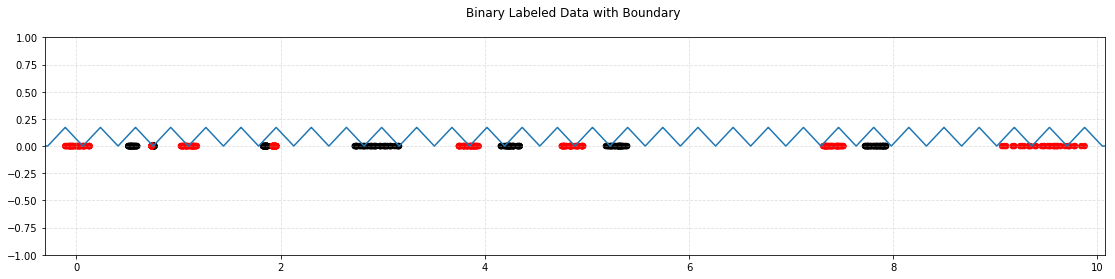

In [39]:
nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 1)

In [40]:
mynetwork.accuracy(X_train,Y_train)

0.4633333333333333

In [41]:
mynetwork.train_biases_only()


In [42]:
from neuralnetwork.optimizers import momentum, RMSprop, adam, nesterov_momentum

num_epochs = 1000
batch_size = 64
learning_rate=0.0001
num_repetitions = 5

Loss:0.696283 Acc:0.463333 val_loss:0.692138 val_acc:0.480000: 100%|██████████| 1000/1000 [00:03<00:00, 324.74it/s]


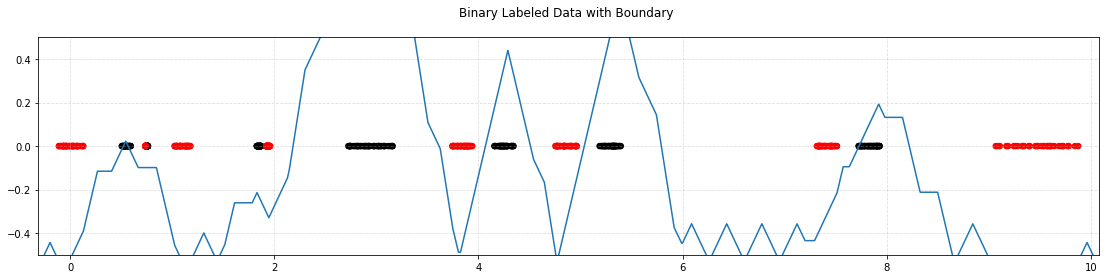

Loss:0.556103 Acc:0.843333 val_loss:0.569840 val_acc:0.793333: 100%|██████████| 1000/1000 [00:02<00:00, 334.94it/s]


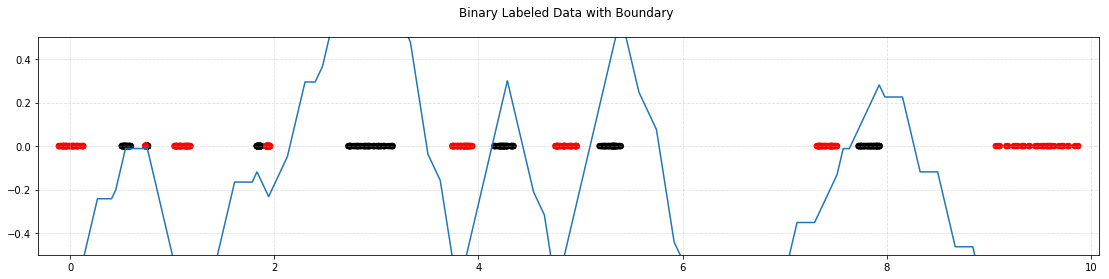

Loss:0.548204 Acc:0.811667 val_loss:0.564555 val_acc:0.753333: 100%|██████████| 1000/1000 [00:03<00:00, 294.13it/s]


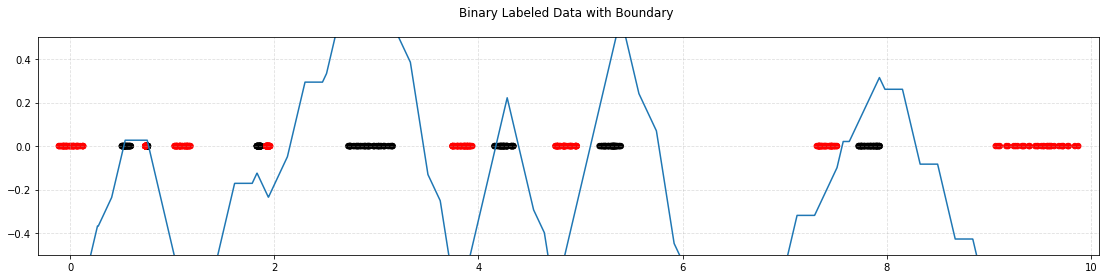

Loss:0.544634 Acc:0.853333 val_loss:0.560971 val_acc:0.820000: 100%|██████████| 1000/1000 [00:03<00:00, 319.66it/s]


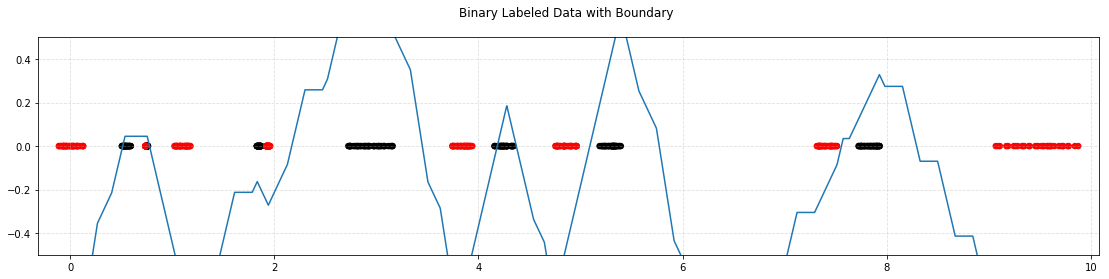

Loss:0.544090 Acc:0.856667 val_loss:0.560640 val_acc:0.826667: 100%|██████████| 1000/1000 [00:03<00:00, 321.21it/s]


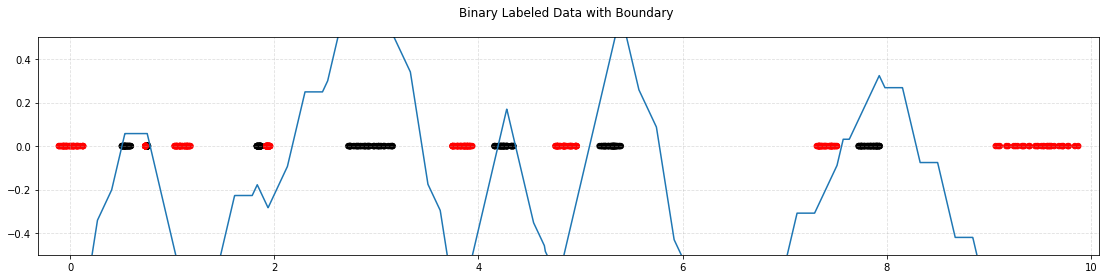

In [43]:
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 0.5)

In [44]:
mynetwork.accuracy(X_train,Y_train)

0.86

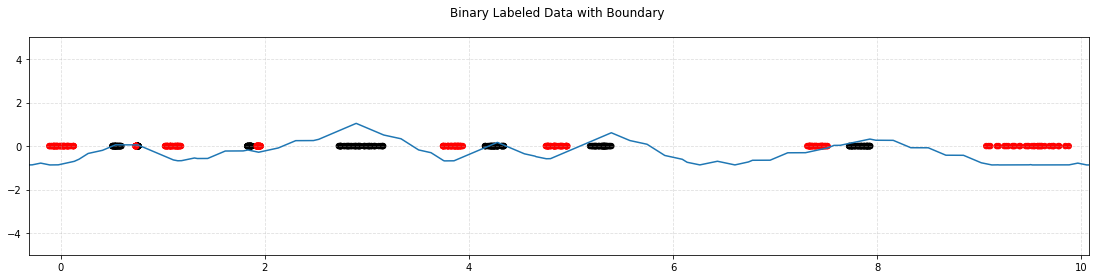

In [45]:
nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 5)

In [46]:
mynetwork.train_all()
#mynetwork.train_slopes_only()

In [47]:
from neuralnetwork.optimizers import momentum, RMSprop, adam, nesterov_momentum

num_epochs = 1000
batch_size = 64
learning_rate=0.0001
num_repetitions = 15

Loss:0.543965 Acc:0.860000 val_loss:0.560291 val_acc:0.840000: 100%|██████████| 1000/1000 [00:03<00:00, 326.62it/s]


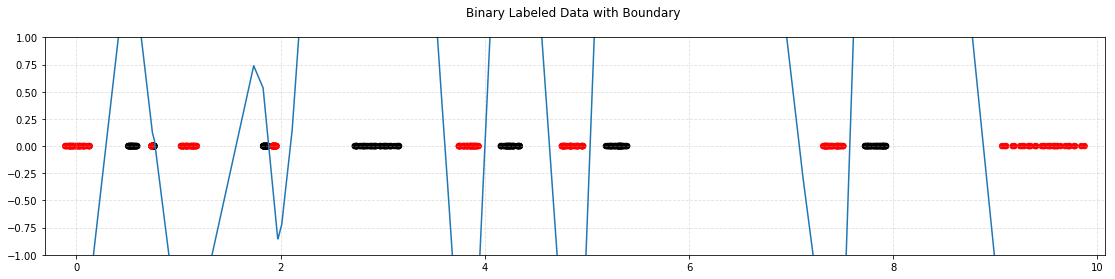

Loss:0.238348 Acc:0.936667 val_loss:0.258921 val_acc:0.920000: 100%|██████████| 1000/1000 [00:03<00:00, 322.51it/s]


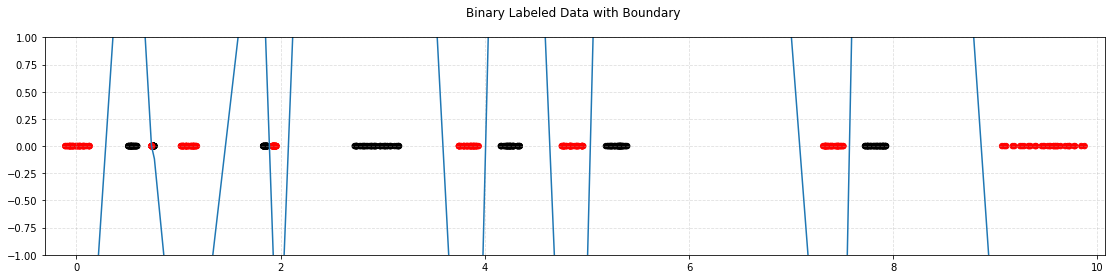

Loss:0.162804 Acc:0.936667 val_loss:0.185066 val_acc:0.920000: 100%|██████████| 1000/1000 [00:03<00:00, 326.69it/s]


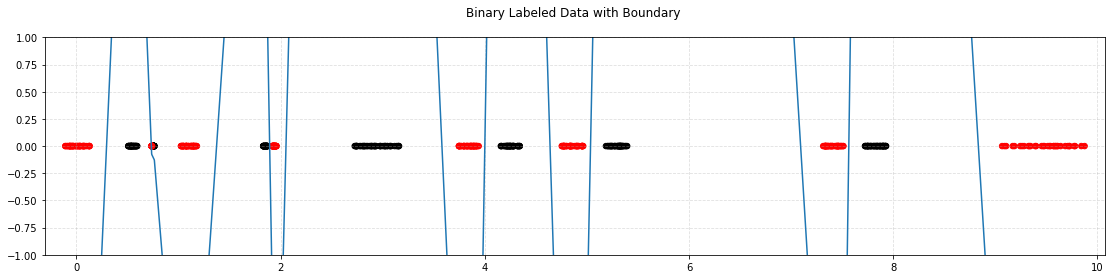

Loss:0.122480 Acc:0.936667 val_loss:0.146055 val_acc:0.920000: 100%|██████████| 1000/1000 [00:03<00:00, 325.09it/s]


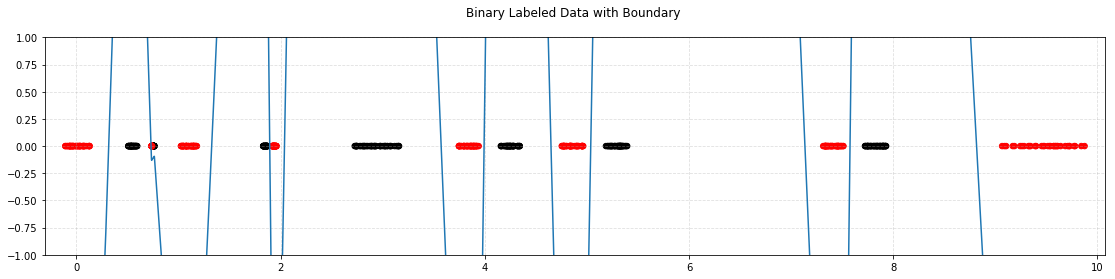

Loss:0.104042 Acc:0.936667 val_loss:0.127125 val_acc:0.920000: 100%|██████████| 1000/1000 [00:03<00:00, 320.73it/s]


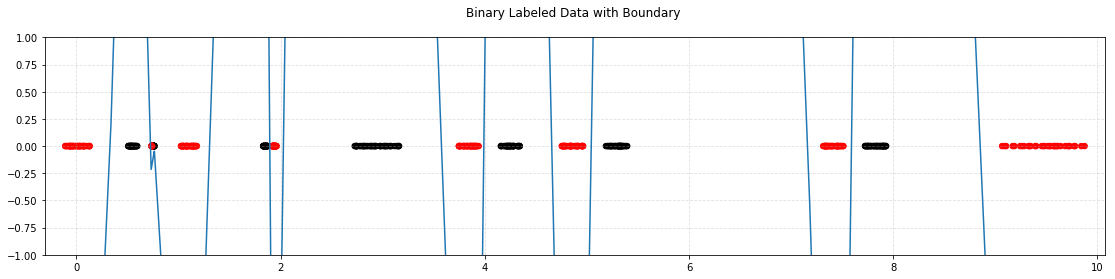

Loss:0.095190 Acc:0.936667 val_loss:0.117226 val_acc:0.920000: 100%|██████████| 1000/1000 [00:03<00:00, 319.25it/s]


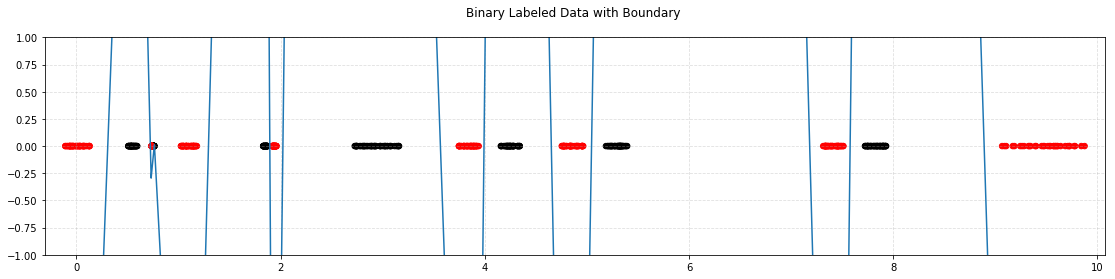

Loss:0.089577 Acc:0.948333 val_loss:0.110621 val_acc:0.946667: 100%|██████████| 1000/1000 [00:03<00:00, 316.09it/s]


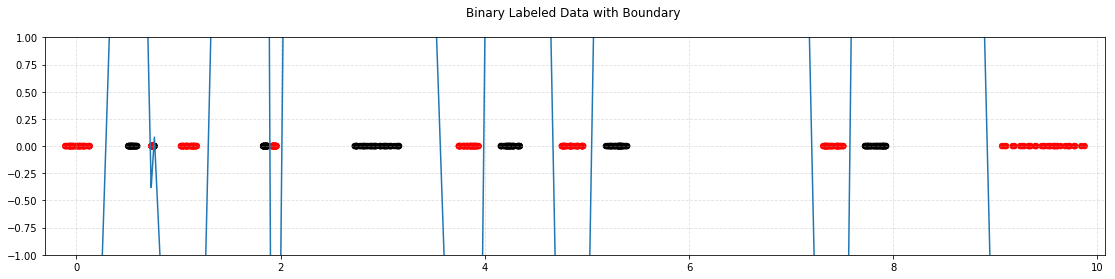

Loss:0.085133 Acc:0.970000 val_loss:0.105224 val_acc:0.980000: 100%|██████████| 1000/1000 [00:03<00:00, 326.58it/s]


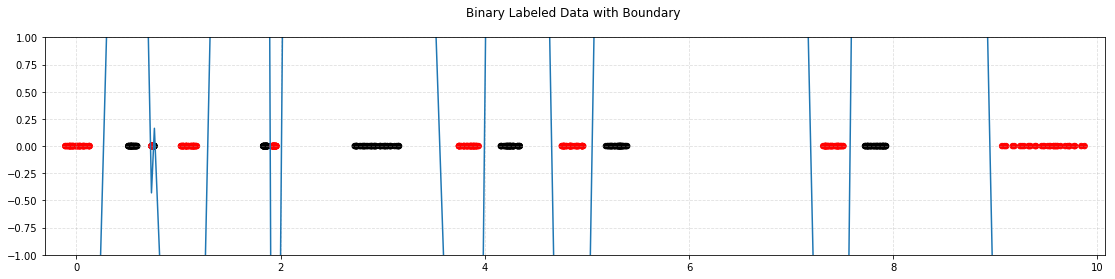

Loss:0.080942 Acc:0.993333 val_loss:0.100013 val_acc:1.000000: 100%|██████████| 1000/1000 [00:03<00:00, 329.55it/s]


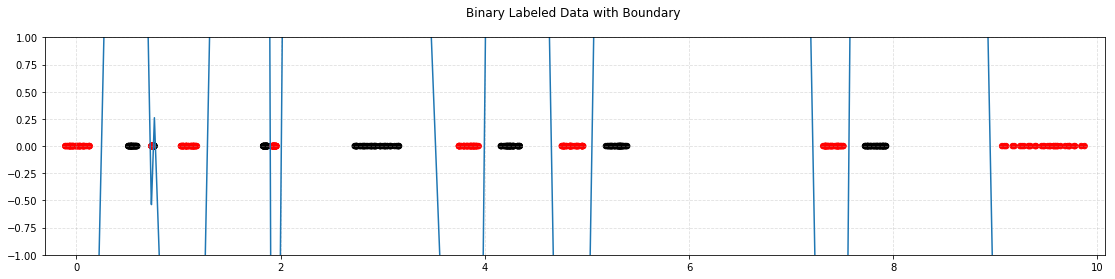

/home/aleksandr/repos/neuralnetwork/neuralnetwork/losses.py:17: RuntimeWarning: divide by zero encountered in log
  losses = -(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat)))
/home/aleksandr/repos/neuralnetwork/neuralnetwork/losses.py:17: RuntimeWarning: invalid value encountered in multiply
  losses = -(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat)))
Loss:nan Acc:1.000000 val_loss:0.094464 val_acc:1.000000: 100%|██████████| 1000/1000 [00:03<00:00, 329.50it/s]


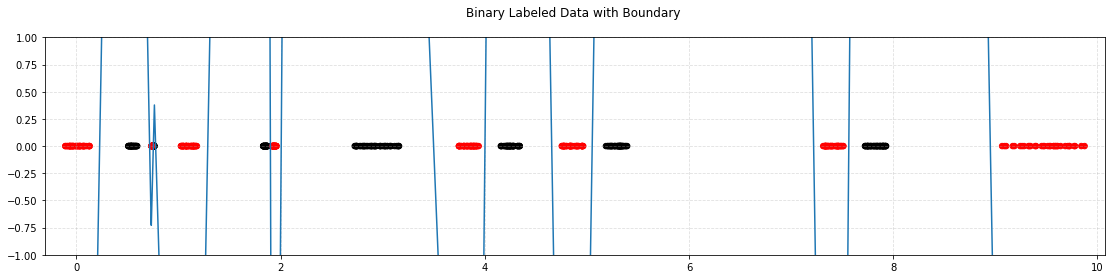

Loss:nan Acc:1.000000 val_loss:nan val_acc:1.000000: 100%|██████████| 1000/1000 [00:03<00:00, 326.78it/s]


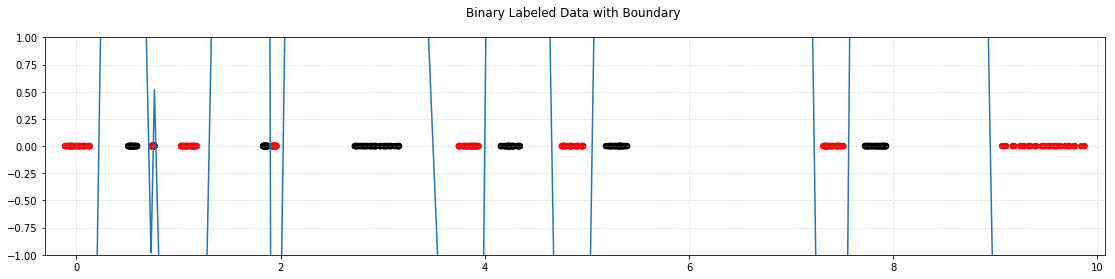

Loss:nan Acc:1.000000 val_loss:nan val_acc:1.000000: 100%|██████████| 1000/1000 [00:02<00:00, 333.72it/s]


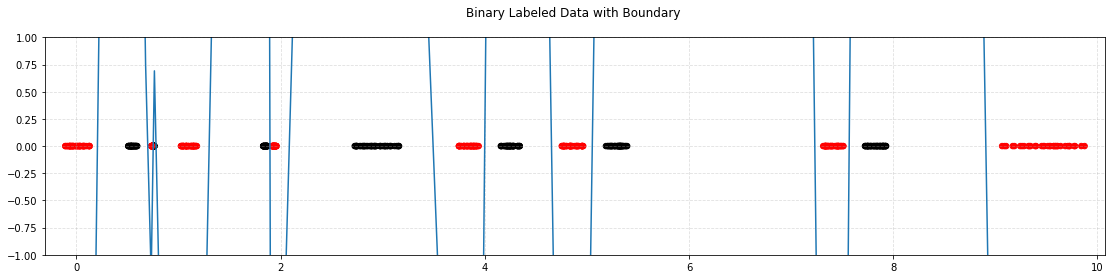

Loss:nan Acc:1.000000 val_loss:nan val_acc:1.000000: 100%|██████████| 1000/1000 [00:03<00:00, 310.49it/s]


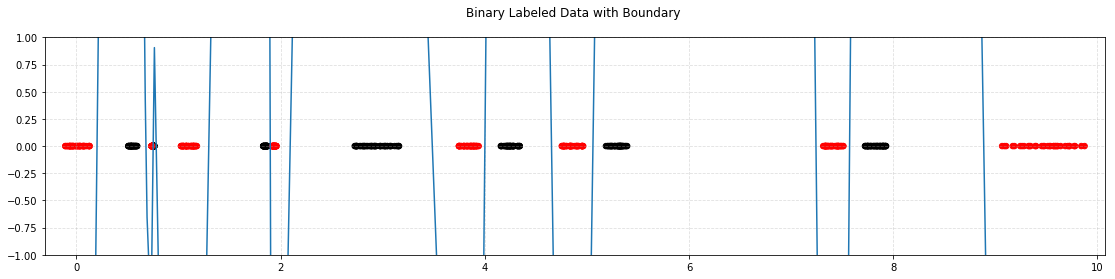

KeyboardInterrupt: 

In [48]:
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 1)